In [1]:
import sklearn
print(sklearn.__version__)

# Importar las bibliotecas necesarias
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import pandas as pd

1.5.0


In [3]:
# Cargar el conjunto de datos de ejemplo (iris)
data = pd.read_csv('/Users/carolinasv/Documents/VS_Code/IoT/pulsera_inteligente/Datasets/Procesados/Dataset_nuevo2.csv')
X = data[["sensación de frío", "fatiga", "manos y pies fríos", "sudoración", "inquietud", "fiebre alta", "erupción cutánea", "letargo", "palpitaciones", "dolor en el pecho", "falta de aliento", "ritmo cardíaco rápido", "ansiedad", "visión borrosa y distorsionada", "vértigo"]]
y = data[['pronóstico']]

In [4]:
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

In [5]:
# Crear el modelo de árbol de decisiones
arbol = DecisionTreeClassifier()

In [6]:
# Entrenar el modelo con los datos de entrenamiento
arbol.fit(X_train, y_train)

DecisionTreeClassifier()

In [7]:
# Realizar predicciones en los datos de prueba
y_pred = arbol.predict(X_test)

In [8]:
from sklearn.model_selection import cross_val_score

# Realizar una validación cruzada de 5 pliegues
precisiones = cross_val_score(arbol, X, y, cv=5, scoring='accuracy')

print(f'Las precisiones obtenidas en cada pliegue son: {precisiones}')
print(f'La precisión media es: {precisiones.mean()}')

Las precisiones obtenidas en cada pliegue son: [0.98742138 0.98113208 0.99371069 1.         1.        ]
La precisión media es: 0.9924528301886791


In [9]:
depths = range(1, 80)  # Vamos a probar profundidades de 1 a 20
accuracies = []

# Entrenar y evaluar el modelo para cada profundidad
for depth in depths:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=22)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f'Depth: {depth}, Accuracy: {accuracy}')

Depth: 1, Accuracy: 0.11949685534591195
Depth: 2, Accuracy: 0.18553459119496854
Depth: 3, Accuracy: 0.3522012578616352
Depth: 4, Accuracy: 0.48427672955974843
Depth: 5, Accuracy: 0.5566037735849056
Depth: 6, Accuracy: 0.6446540880503144
Depth: 7, Accuracy: 0.8081761006289309
Depth: 8, Accuracy: 0.9591194968553459
Depth: 9, Accuracy: 0.9716981132075472
Depth: 10, Accuracy: 0.9748427672955975
Depth: 11, Accuracy: 0.9779874213836478
Depth: 12, Accuracy: 0.9874213836477987
Depth: 13, Accuracy: 0.9874213836477987
Depth: 14, Accuracy: 0.9874213836477987
Depth: 15, Accuracy: 0.9874213836477987
Depth: 16, Accuracy: 0.9874213836477987
Depth: 17, Accuracy: 0.9874213836477987
Depth: 18, Accuracy: 0.9874213836477987
Depth: 19, Accuracy: 0.9874213836477987
Depth: 20, Accuracy: 0.9874213836477987
Depth: 21, Accuracy: 0.9874213836477987
Depth: 22, Accuracy: 0.9874213836477987
Depth: 23, Accuracy: 0.9874213836477987
Depth: 24, Accuracy: 0.9874213836477987
Depth: 25, Accuracy: 0.9874213836477987
Depth:

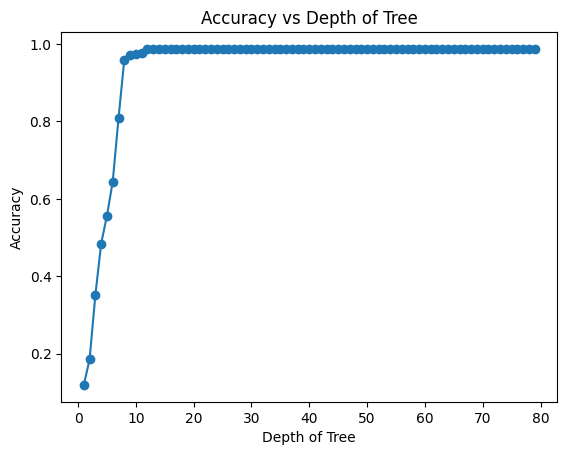

In [10]:
# Crear un gráfico de la precisión en función de la profundidad
import matplotlib.pyplot as plt
plt.plot(depths, accuracies, marker='o')
plt.xlabel('Depth of Tree')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Depth of Tree')
plt.show()


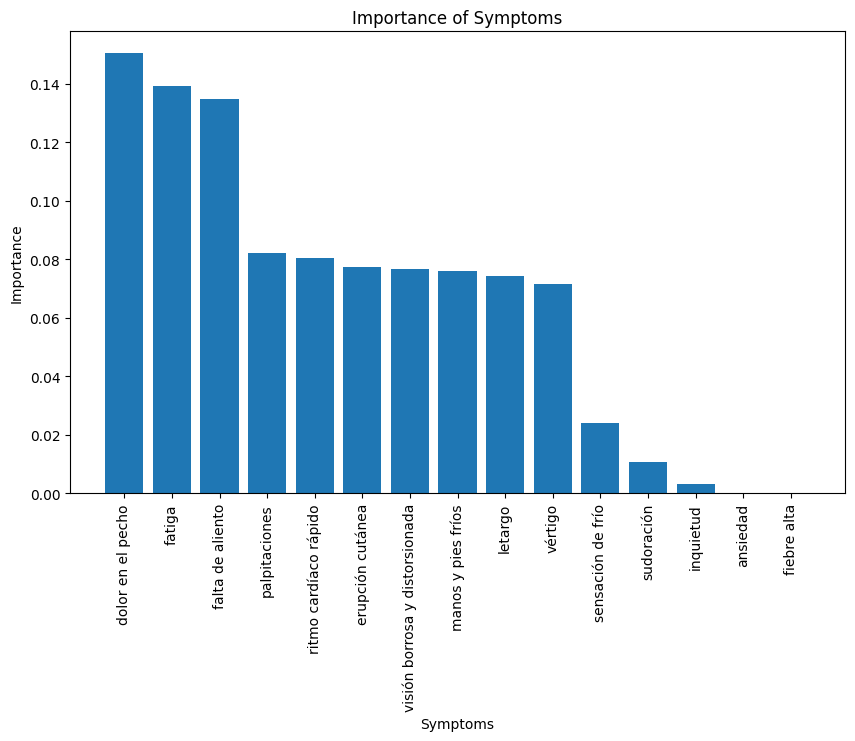

In [11]:
# Crear un gráfico de la importancia de las características
import matplotlib.pyplot as plt
import numpy as np
importance = arbol.feature_importances_
symptoms = X.columns

# Sort the importance values and symptoms in descending order
sorted_indices = np.argsort(importance)[::-1]
sorted_importance = importance[sorted_indices]
sorted_symptoms = symptoms[sorted_indices]

# Create a bar plot of the importance of symptoms
plt.figure(figsize=(10, 6))
plt.bar(sorted_symptoms, sorted_importance)
plt.xticks(rotation=90)
plt.xlabel('Symptoms')
plt.ylabel('Importance')
plt.title('Importance of Symptoms')
plt.show()

In [12]:
# Ajustar la precisión del modelo a 15 capas de profudidad
clf = DecisionTreeClassifier(max_depth=12, random_state=22)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 0.9874213836477987


In [13]:
# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión:", accuracy)

Precisión: 0.9874213836477987


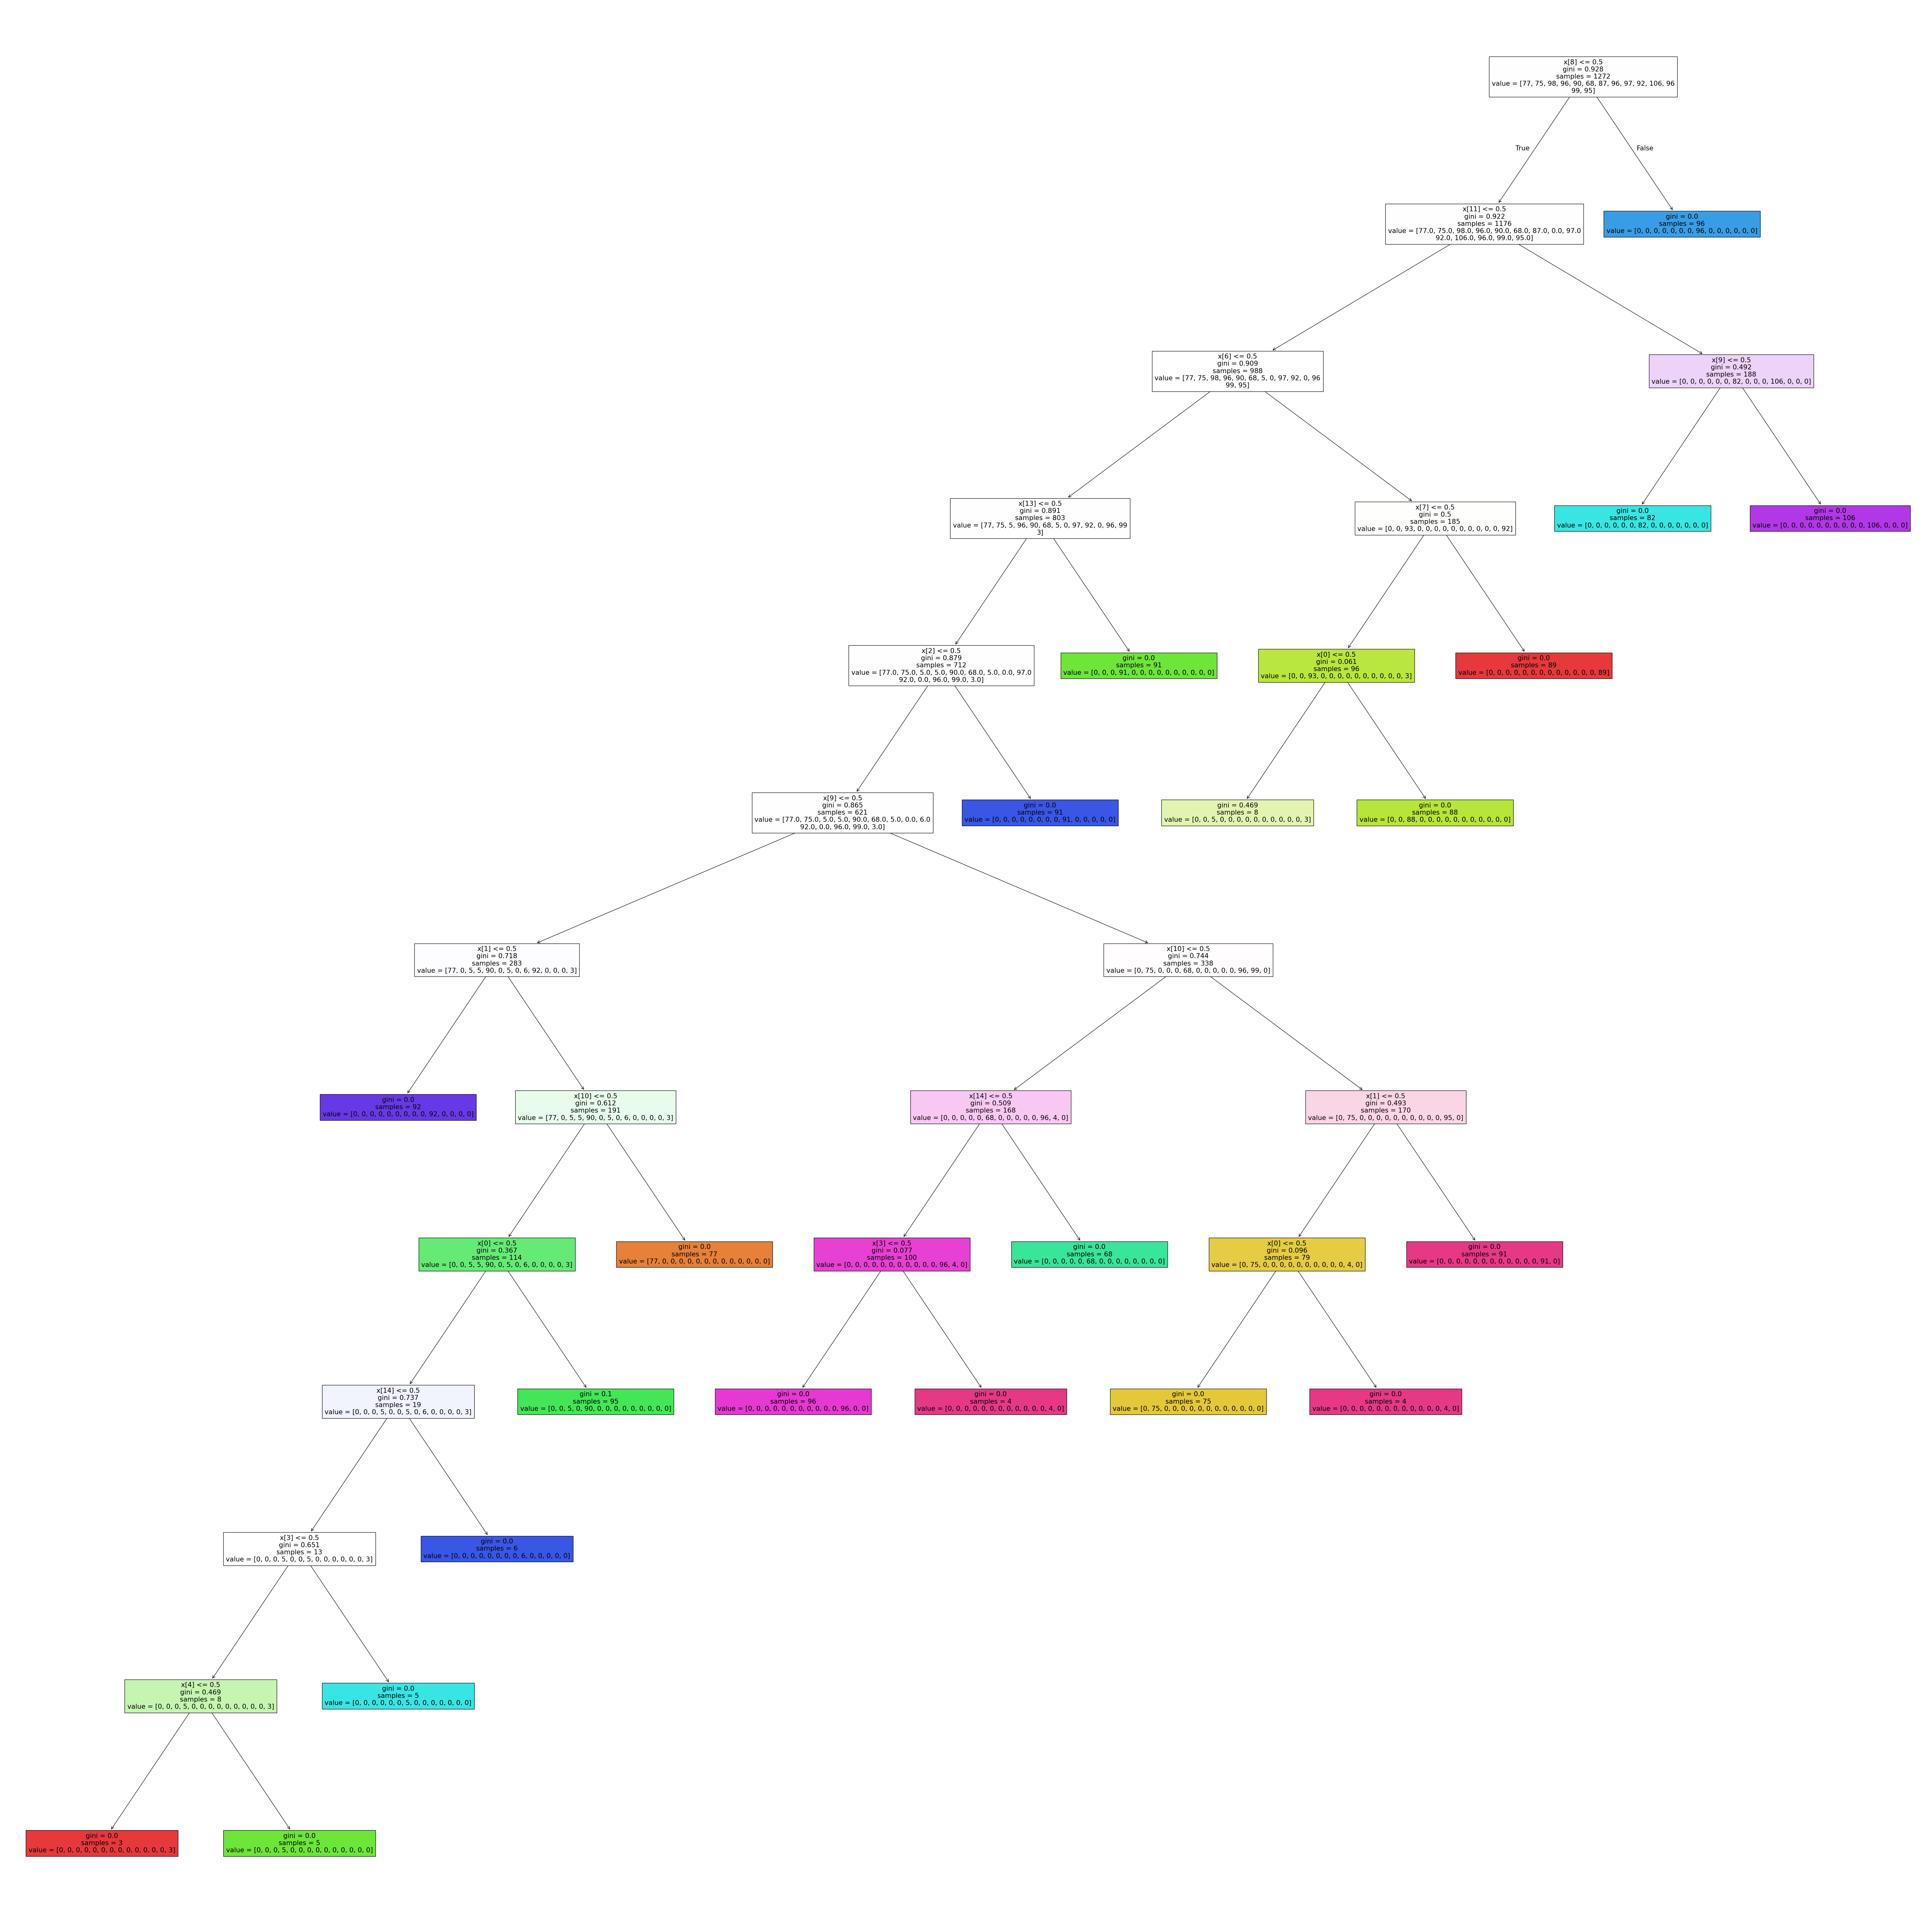

In [14]:
# Importar las bibliotecas necesarias
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Crear una figura y un eje
fig, ax = plt.subplots(figsize=(80, 80))  # Ajusta el tamaño de la figura aquí

# Visualizar el árbol de decisiones
plot_tree(arbol, filled=True, ax=ax)  # El parámetro 'filled' añade colores

# Mostrar la figura
plt.show()

In [15]:
# Guardar el modelo en un archivo
import joblib
joblib.dump(arbol, 'prediccion_nueva.joblib')

['prediccion_nueva.joblib']